Attributes                    No. of Missing Values
--------------------------------------------------
ID                            0
Name                          0
Age                           0
Photo                         0
Nationality                   0
Flag                          0
Overall                       0
Potential                     0
Club                          264
Club Logo                     0
Value                         0
Wage                          0
Special                       0
Preferred Foot                0
International Reputation      0
Weak Foot                     0
Skill Moves                   0
Work Rate                     0
Body Type                     29
Real Face                     29
Position                      26
Jersey Number                 26
Joined                        1512
Loaned From                   15578
Contract Valid Until          351
Height                        0
Weight                        0
Crossing          

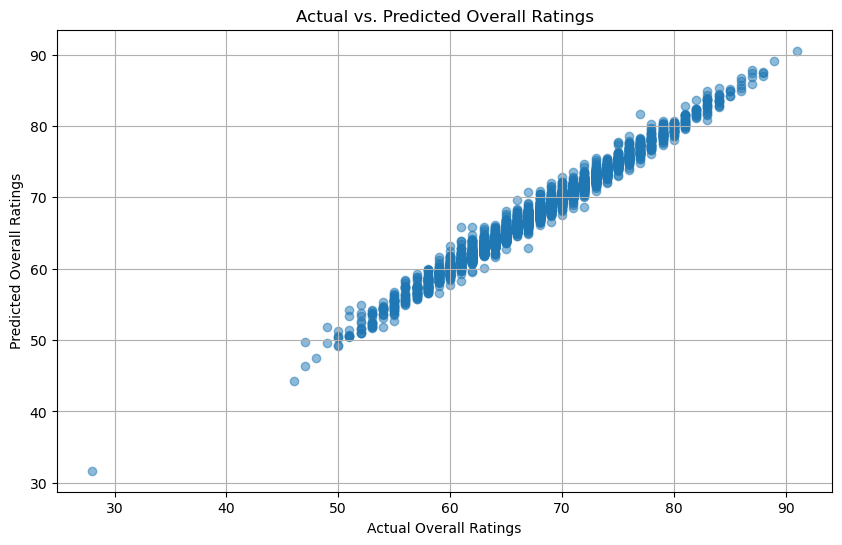


Comparison of Actual vs. Predicted Ratings:

Player Name              Actual Overall Ratings   Predicted Overall Ratings
---------------------------------------------------------------------------

K. Woolery               64                       63.25461355035438

Ferro                    75                       75.11925565913894

21 J. Cuadrado           68                       68.81809330571994

21 R. Rojas              71                       70.76326922340817

G. Lovrencsics           70                       69.94028555324564

Nicolás Filhei           76                       75.09704112001215

J. Biegański             64                       64.2351714890011

N. Bitton                69                       68.22486637298749

E. Iñíguez               68                       67.28590325811072

21 O. Pikhalyonok        65                       64.84049027081926



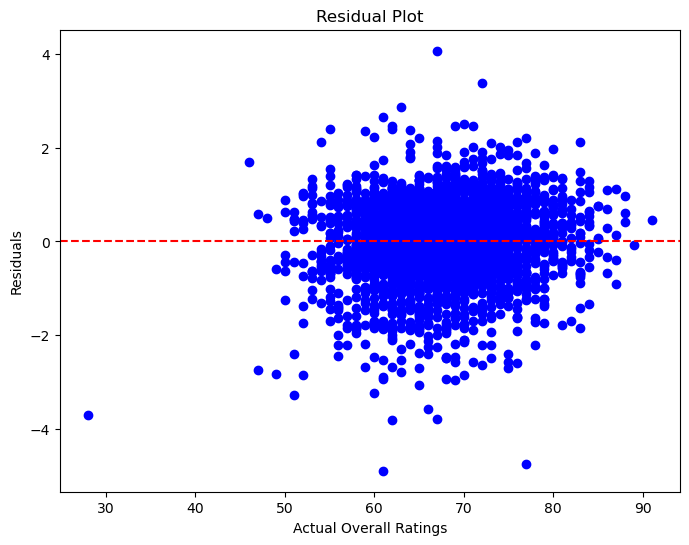

AttributeError: 'function' object has no attribute 'feature_importances_'

In [4]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from colorama import Fore, Style
import matplotlib.pyplot as plt

data = pd.read_csv('FIFA22_official_data.csv')

missing_values = data.isnull().sum()
all_columns = data.columns

print(f"{Fore.BLUE}{'Attributes':<30}{'No. of Missing Values'}")
print("-" * 50)
for column in all_columns:
    if column in missing_values.index:
        count = missing_values[column]
        if count > 0:
            print(f"{Fore.RED}{column:<30}{count}")
        else:
            print(f"{Fore.GREEN}{column:<30}{count}")
print(Style.RESET_ALL)

numeric_columns = data.select_dtypes(include=['float64', 'int64']).columns
data[numeric_columns] = data[numeric_columns].fillna(data[numeric_columns].mean())
data_numeric = data[numeric_columns]

X = data_numeric.drop('Overall', axis=1)
y = data_numeric['Overall']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = LinearRegression()
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"{Fore.GREEN}Mean Squared Error: {mse}{Style.RESET_ALL}")#average of the squared differences between the actual and predicted values.
print(f"{Fore.BLUE}R-squared: {r2}{Style.RESET_ALL}")#measures the proportion of variance in the target variable (player ratings) 

##############################################################

results = pd.DataFrame({'Player Name': data.loc[X_test.index]['Name'], 'Actual Overall Ratings': y_test, 'Predicted Overall Ratings': y_pred})

plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, alpha=0.5)
plt.xlabel('Actual Overall Ratings')
plt.ylabel('Predicted Overall Ratings')
plt.title('Actual vs. Predicted Overall Ratings')
plt.grid(True)
plt.show()

print(f"{Fore.YELLOW}\033[1m\nComparison of Actual vs. Predicted Ratings:\n{Style.RESET_ALL}")

print(f"{Fore.GREEN}{results.columns[0]: <25}{results.columns[1]: <25}{results.columns[2]}")
print("-" * 75)
print(Style.RESET_ALL)

for _, row in results.sample(10).iterrows():
    print(f"{Fore.CYAN}{row[0]: <25}{row[1]: <25}{row[2]}")
    print(Style.RESET_ALL)


########################################################################################


